<a href="https://colab.research.google.com/github/henriquebap/Disruptive-Architectures-IA-e-IoT/blob/main/material/aulas/IA/lab03/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivos

  - Apresentar o conceito de Regressão
  - Apresentar e utilizar algoritmo de Regressão linear
  - Apresentar e utilizar Regressão Polinomial
  - Apresentar e discutir a matriz de correlação
  - Apresentar uma intuição sobre métricas de avaliação (MSE, RMSE e $ R² $ )


  

## Começando

Sabemos que dentro de aprendizado supervisionado vamos trabalhar com dois tipos de problemas:

- [x]  Classificação - (Já conhecemos o KNN)
- [ ]  Regressão - (Objetivo de hoje)

### Uma intuição sobre problemas que envolvem cada um deles:

        Classificação --> Resultados discretos (categóricos).
        Regressão --> Resultados numéricos e contínuos.


### Regressão linear

É uma técnica que consiste em representar um conjunto de dados por meio de uma reta.


    Na matemática aprendemos que a equação de uma reta é:

$$
Y = A + BX \\
$$
A e B são constantes que determinam a posição e inclinação da reta. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão linear é:

$$
Y_{predito} = \beta_o + \beta_1X \\
$$

$ \beta_o $ e $ \beta_1 $ são parâmetros que determinam o peso e bias da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.

![reta](/aulas/lab03/reta.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/reta.png?raw=1">

Essa ideia se estende para mais de um parâmetro independente, mas nesse caso não estamos associando a uma reta e sim a um plano ou hiperplano:

$$
Y_{predito} = \beta_o + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n\\
$$

![plano](/aulas/lab03/plano.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/plano.png?raw=1" width="450">

Em outras palavras, modelos de regressão linear são intuitivos, fáceis de interpretar e se ajustam aos dados razoavelmente bem em muitos problemas.


## Bora lá!!

Vamos juntos realizar um projeto, do começo ao fim, usando regressão.



## Definição do problema

Vamos trabalhar com um dataset com informações coletadas U.S Census Service (tipo IBGE americano) sobre habitação na área de Boston Mass.

ref: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

informação importante sobre o significado de cada um dos atributos

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


    Queremos desenvolver um modelo capaz de predizer o valor de um imovel em Boston.


### Desafio 1

Do ponto de vista de machine learning, que problema é esse:

    Aprendizado supervisionado, não-supervisionado ou aprendizado por reforço?

R: Aprendizado Supervisionado

    Classificação, regressão ou clusterização?

R: classificacao e regressao


In [34]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml




O scikit-learn possui diversos dataset em seu banco de dados, um deles é o dataset que vamos utilizar hoje.

faça o import direto usando ***sklearn.datasets***

caso queira, você pode fazer o downlod do dataset direto do site e importar em seu projeto.



In [ ]:
# from sklearn.datasets import load_boston

# boston_dataset = load_boston()

# #para conhecer o que foi importado do dataset
# boston_dataset.keys()


In [17]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# for the California housing dataset and::
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
# import pandas as pd
# import numpy as np
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]



In [18]:
# vamos carregar no pandas apenas data com os dados e "feature_names" com os nomes dos atributos

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


In [19]:
#vamos adicionar mais uma coluna ao nosso dataframe com o target (alvo que vamos fazer a predição)
df['MEDV'] = housing.target

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MEDV
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


### Desafio 2

Use os metodos info() e describe() para exibir as informações do dataframe e responda:

Existe dados faltantes?

Qual o tamanho do dataset, quantas linhas e quantas colunas?



In [21]:
# Mostra informações sobre o dataframe em si
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MEDV
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Desafio 3

Aplique os métodos que achar conveniente (vimos algumas opções na última aula) para visualizar os dados de forma gráfica.


<ipython-input-47-9ef85efa41a3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


<Axes: >

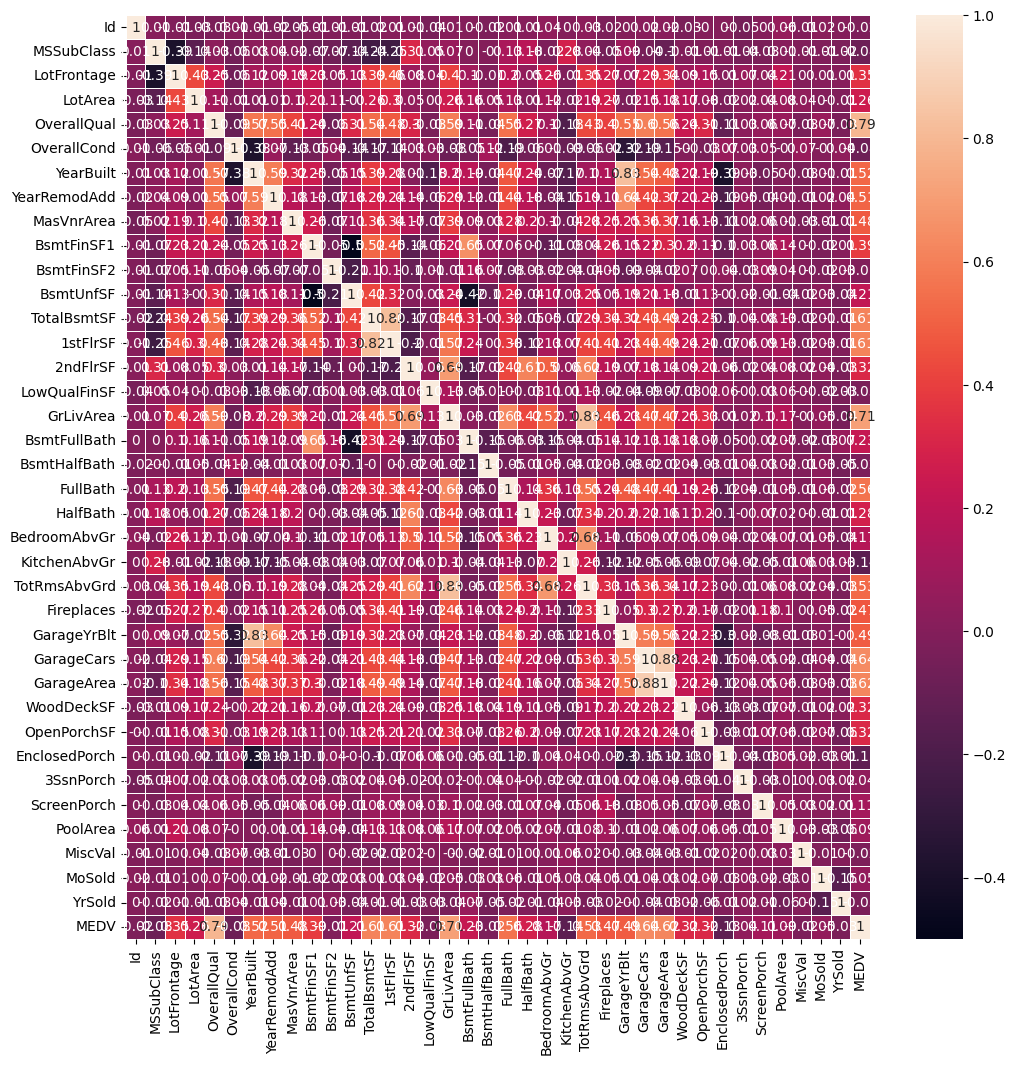

In [47]:
#Vamos explorar um pouco uma matrix de correlação

#Filtrar e fazer sub df para melhorar a visualizacao
import seaborn as sns

correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### Desafio 4

Analisando a matriz de correlação acima responda:

Qual feature possue a maior correlação ***positiva*** com o target?

Qual feature possue a maior correlação ***negativa*** com o target?


<Axes: xlabel='Id', ylabel='MEDV'>

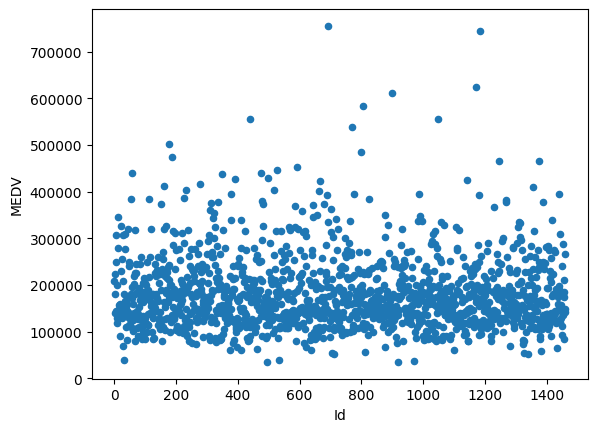

In [42]:
df.plot.scatter('Id', 'MEDV')

<Axes: xlabel='OverallQual', ylabel='MEDV'>

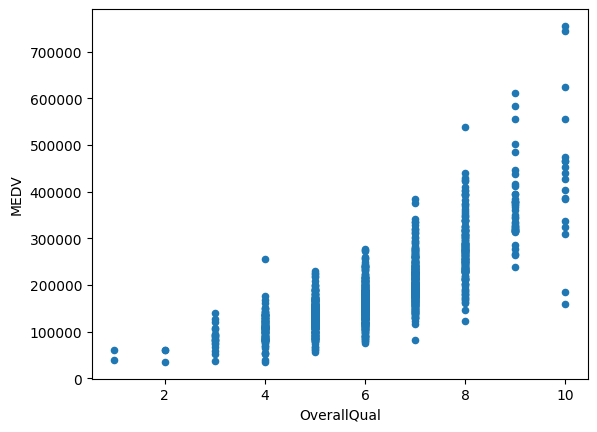

In [43]:
df.plot.scatter('OverallQual', 'MEDV')

<Axes: xlabel='GarageArea', ylabel='GarageCars'>

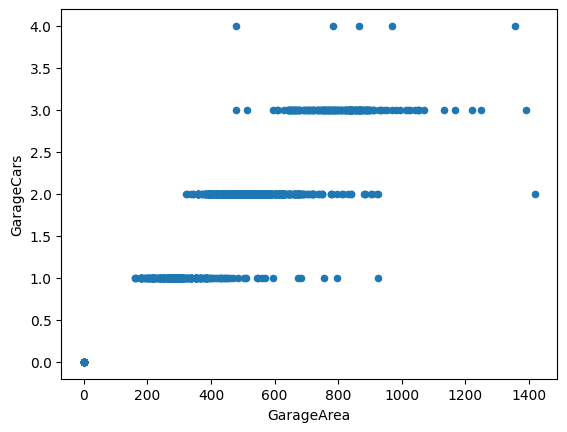

In [46]:
df.plot.scatter('GarageArea', 'GarageCars')

<Axes: xlabel='GarageYrBlt', ylabel='YearBuilt'>

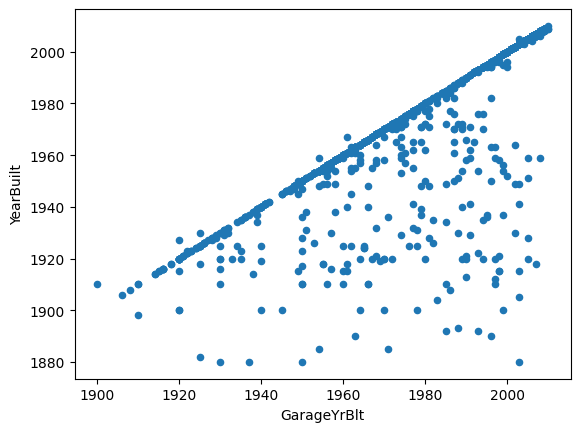

In [48]:
df.plot.scatter('GarageYrBlt', 'YearBuilt')

In [57]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
MEDV               0
Length: 81, dtype: int64

## PARE!!!

A análise feita no desafio 2 e 3 é uma das etapas mais importantes. Caso você tenha pulado essa etapa, volte e faça suas análises.

Com essa etapa concluída, vamos criar um sub-dataset com os atributos que serão utilizados.


In [49]:
# Vamos treinar nosso modelo com 2 dois atributos independentes
# para predizer o valor de saida
X = df[['GarageYrBlt', 'YearBuilt']]   ### teste com duas entradas
#X = df[['RM']]            ### teste com uma entrada
#X = df.drop(['MEDV'], axis=1)     ### teste com todas as entradas

Y = df['MEDV']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (1460, 2) e saidas (1460,)


## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***


***scikit-learn*** Caso ainda não tenha instalado, no terminal digite:
- pip install scikit-learn



In [50]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(1168, 2)
(292, 2)
(1168,)
(292,)


In [51]:
#Primeiras linhas do dataframe
X_treino.head()

,GarageYrBlt,YearBuilt
1211,1988.0,1988
1191,1999.0,1999
451,1975.0,1975
764,1995.0,1995
175,1950.0,1950


In [52]:
Y_treino.head()

1211    164000
1191    174000
451     280000
764     270000
175     243000
Name: MEDV, dtype: int64

## Chegou a hora de aplicar o modelo preditivo

Treinar um modelo no python é simples se usar o Scikit-Learn.
Treinar um modelo no Scikit-Learn é simples: basta criar o regressor, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



In [ ]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)




Pronto!! bora testar se esta funcionando....


In [ ]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))


In [ ]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else:
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


In [ ]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

## Avaliando o modelo treinado

Vamos colocar alguns valores e ver a predição do classificador.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

### Desafio 5

Refaça o notebook substituindo o algoritmo de regressão linear por outro algoritmo de regressão e compare os resultados obtidos.

Sugestão de alguns algoritmos de ML para problemas de regressão:

| Nome | Vantagem | Desvantagem | Exemplo sklearn |
|:---:|:---:|:---:|:---:|
| Regressão Linear | Fácil de entender e implementar | Pode não ser adequado para problemas mais complexos | from sklearn.linear_model import LinearRegression<br><br><br>model = LinearRegression()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Árvores de decisão | Fácil de entender e visualizar | Pode levar a overfitting se a árvore for muito grande | from sklearn.tree import DecisionTreeRegressor<br><br><br>model = DecisionTreeRegressor()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Random Forest | Mais robusto e geralmente mais preciso do que uma única árvore de decisão | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import RandomForestRegressor<br><br><br>model = RandomForestRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Support Vector Regression (SVR) | Lida bem com dados multidimensionais e não lineares | Pode ser difícil de escolher o kernel correto e ajustar os hiperparâmetros | from sklearn.svm import SVR<br><br><br>model = SVR(kernel='rbf')<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Gradient Boosting | Preciso e lida bem com dados multidimensionais e não lineares | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import GradientBoostingRegressor<br><br><br>model = GradientBoostingRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
|  |  |  |  |




In [ ]:
## implemente sua sua solução....




## Regressão Polinomial

$$
Y = A + BX + C X² \\
$$
A, B e C são constantes que determinam a posição e inclinação da curva, o 2 indica o grau do polinômio. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão Polinomial é:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² \\
$$

$ \beta_o $ , $ \beta_1 $ e $ \beta_2 $ são parâmetros que determinam o peso da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.


Essa ideia se estende para polinômio de graus maiores:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² + ... + \beta_nX^n\\
$$



In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#####----------- vou gerar alguns numeros aleatórios ------------------

#gerando numeros aleatorios, apenas para este exemplo
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3)+ 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# ajuste nos dados, pois estamos trabalhando com a numpy
x = x[:, np.newaxis]
y = y[:, np.newaxis]
####---------------pronto já temos os dados para treinar -------------


#----É aqui que o seu código muda ------------------------------------

# Chama a função definindo o grau do polinomio e aplica o modelo

grau_poly = 1
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()

### Desafio 6

Faça uma função que calcula a regressão polinomial (basicamente colocar o codigo acima em uma função), agora faça um código que chama essa função alterando o grau do polinomio de 2 até 10, basicamente um loop for que chama a função criada.

Análise os resultados obtidos e determine qual o melhor grau polinomio do seu modelo.

In [ ]:
## Implemente sua solução




